# TF-IDF with K-means clustering

While _TF-IDF_ was presented in the last section, for us to understand what the metric is, here we will use it to cluster documents (or IMDb plots in our case) using the K-means clustering algorithm. As you will see, to achieve this, we will use sci-kit's `sklearn` packages, making the _TF-IDF_ vectorisation quite easy!

## Loading the IMDb dataset

Load the IMDb dataset and look closely at the 'Plot' column

In [1]:
import pandas as pd
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv(r"C:\Users\Gebruiker\Documents\CODE\Master\Personalisation\INFOMPPM_local\Week 05\data\imdb.csv")

In [33]:
df["PlotLength"] = df["Plot"].str.len()

df_limited = df[(df["PlotLength"] > 50) & (df["PlotLength"] < 250)]

print(df.shape)
print(df_limited.shape)

(5380, 28)
(5274, 28)


In [36]:
import plotly.express as px

fig = px.histogram(df, x = "PlotLength")

fig.show()

Make a list of plots, filtering out any non-string like entities from the dataframe.

In [37]:
list_plots = df_limited['Plot'].tolist()
filtered_plots = []

for plot in list_plots:
    if type(plot) == str:
        filtered_plots.append(plot)
        
        

In [6]:
print(len(filtered_plots))
print(len(list_plots))

5368
5380


## Preprocessor: Strip punctuation from text

As you can see below, `sklearn` allows us to preprocess the strings it takes as input (our list of plots) by asking for a function taking a single string as input and returning a cleaned up string as output. Complete the function below by stripping out any punctionation from the input. Try utilising python's `string` library to do so.

In [42]:
import string 

def preprocess(text):
    text = text.translate(str.maketrans(' ', ' ', string.digits))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

pre_plots = []
for plot in filtered_plots:
    pre = preprocess(plot)
    pre_plots.append(pre)
    
pre_plots
    


['a former intelligence and fbi officer who now works as a security expert in las vegas is recruited by mysterious pit boss mr johnson to based on his tips try to prevent crimes while the rich place bets on his chances of success',
 'a bus driver and his sewer worker friend struggle to strike it rich while their wives look on with weary patience',
 'the misadventures of a misfit pt boat crew during world war ii',
 'a witch married to an ordinary man cannot resist using her magic powers to solve the problems her family faces',
 'the staff of an army hospital in the korean war find that laughter is the best way to deal with their situation',
 'a veteran cop with more than  years of experience is teamed with a young inspector to solve crimes in san francisco',
 'four vietnam vets framed for a crime they didnt commit help the innocent while on the run from the military',
 'resplendent with authentic s music fashion and vibe miami vice follows two undercover detectives and their extended te

## TF-IDF and K-means

Sci-kit's `sklearn` library has both _TF-IDF_ and K-means clustring functionality which we can use in conjunction together. As you can see below, the `TfidfVectorizer` can be used to compute _TF-IDF_ out of a list of documents (plots in our case). Interestingly, the vectorizer has both stop_words and preprocessor functionalities, something that ressembles the types of string manipulation we did in the previous section. When the `tfidf` matrix (yes, it is a matrix here) is computed, `KMeans` is used to cluster documents according to the content of their respective `tfidf` vector. 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess, lowercase=True, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(pre_plots)

kmeans = KMeans(n_clusters=6).fit(tfidf)

C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



What does the kmeans variable hold in terms of data? What are the kmeans labels?

In [9]:
kmeans.labels_

array([0, 0, 2, ..., 3, 0, 0])

One thing which is interesting with kmeans is that one can predict the cluster of new data. As we are working with text here, this prediction is rather easy to test using the above `tfidf_vectorizer` and `kmeans`. 

In [10]:
sentences_to_predict = ["I am a young person looking for an apartment in San Francisco", "I really like the old vibes and of Miami"]
kmeans.predict(tfidf_vectorizer.transform(sentences_to_predict))

array([4, 0])

## Visualise clusters

Below is a (modified) plot function from our manual discussed in Ch.7. section 7.4.2. It displays clusters in a graph. It is the __same__ function we saw last week in _03-k-means-clustering_. 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot(user_ratings, k):

        h = 0.2
        reduced_data = PCA(n_components=2).fit_transform(user_ratings)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(reduced_data)

        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = kmeans.cluster_centers_
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='r', zorder=10)
        plt.title('K-means clustering of the user')

Use the function above to display the computed _TF-IDF_ clusters.  

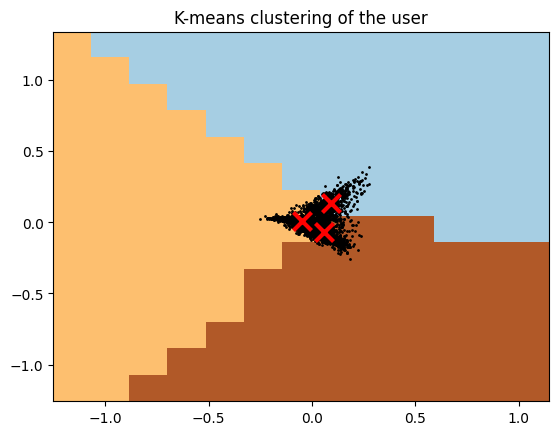

In [47]:
from scipy.sparse import dok_matrix

# Convert text data to dok_matrix using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pre_plots)
sparse_matrix = dok_matrix(tfidf_matrix)
sparse_matrix = sparse_matrix.todense()
sparse_matrix = np.asarray(sparse_matrix)
# Visualize clustering
plot(sparse_matrix, k=3)

## Saving clusters

Save your clusters in a pandas dataframe.

In [ ]:
# code goes here